# Practical 5: Introduction to exiobase

Based on [Exiobase's IOT_2019_pxp.zip](https://zenodo.org/record/5589597) dataset

In [1]:
# Import modules
import pandas as pd
import numpy as np

## Data pre-processing

### Load data

In [2]:
dir_path = "../data/exiobase/_pxp/IOT_2019_pxp/"

The folder has the following structure:  

```
├── impacts  
│   ├── F_Y.txt  
│   ├── F.txt  
│   └── ...
├── satellite  
│   └── ...
├── A.txt
├── finaldemands.txt  
├── industries.txt  
├── products.txt  
├── unit.txt  
├── x.txt  
├── Y.txt  
└── Z.txt  
```

In [3]:
# Import A, Y, F and F_Y (from IMPACTS)
# ! 'A' is a large datasets, mind load time
A = pd.read_csv(f'{dir_path}A.txt', delimiter="\t", header=[0,1], index_col=[0,1])
Y = pd.read_csv(f'{dir_path}Y.txt', delimiter="\t", header=[0,1], index_col=[0,1])
F = pd.read_csv(f'{dir_path}impacts/F.txt', delimiter="\t", header=[0,1], index_col=[0])
F_y = pd.read_csv(f'{dir_path}impacts/F_Y.txt', delimiter="\t", header=[0,1], index_col=[0])
F_unit = pd.read_csv(f'{dir_path}impacts/unit.txt', delimiter="\t", header=[0,1], index_col=[0])

In [4]:
# Visualize
A  # Y, F, F_Y

region                                                           AT  \
sector                                                   Paddy rice   
region sector                                                         
AT     Paddy rice                                                 0   
       Wheat                                                      0   
       Cereal grains nec                                          0   
       Vegetables, fruit, nuts                                    0   
       Oil seeds                                                  0   
...                                                             ...   
WM     Membership organisation services n.e.c. (91)               0   
       Recreational, cultural and sporting services (92)          0   
       Other services (93)                                        0   
       Private households with employed persons (95)              0   
       Extra-territorial organizations and bodies                 0   

region                                                                  \
sector                                                           Wheat   
region sector                                                            
AT     Paddy rice                                         0.000000e+00   
       Wheat                                              3.313462e-02   
       Cereal grains nec                                  0.000000e+00   
       Vegetables, fruit, nuts                            0.000000e+00   
       Oil seeds                                          0.000000e+00   
...                                                                ...   
WM     Membership organisation services n.e.c. (91)       4.473350e-09   
       Recreational, cultural and sporting services (92)  1.155801e-06   
       Other services (93)                                3.245491e-07   
       Private households with employed persons (95)      0.000000e+00   
       Extra-territorial organizations and bodies         0.000000e+00   

region                                                                      \
sector                                                   Cereal grains nec   
region sector                                                                
AT     Paddy rice                                             0.000000e+00   
       Wheat                                                  0.000000e+00   
       Cereal grains nec                                      1.434620e-02   
       Vegetables, fruit, nuts                                0.000000e+00   
       Oil seeds                                              0.000000e+00   
...                                                                    ...   
WM     Membership organisation services n.e.c. (91)           3.998032e-09   
       Recreational, cultural and sporting services (92)      1.039146e-06   
       Other services (93)                                    2.900140e-07   
       Private households with employed persons (95)          0.000000e+00   
       Extra-territorial organizations and bodies             0.000000e+00   

region                                                                            \
sector                                                   Vegetables, fruit, nuts   
region sector                                                                      
AT     Paddy rice                                                   0.000000e+00   
       Wheat                                                        0.000000e+00   
       Cereal grains nec                                            0.000000e+00   
       Vegetables, fruit, nuts                                      6.818953e-02   
       Oil seeds                                                    0.000000e+00   
...                                                                          ...   
WM     Membership organisation services n.e.c. (91)                 3.906652e-09   
       Recreational, cultural and s

### Get labels

In [5]:
# get multiindex
region_and_sector_labels = A.index

# get each level using  'get_level_values()'
region_labels = A.index.get_level_values(level=0).unique()
sector_labels = A.index.get_level_values(level=1).unique()

# visualize
region_labels

Index(['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR', 'GR',
       'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'MT', 'NL', 'PL', 'PT', 'RO',
       'SE', 'SI', 'SK', 'GB', 'US', 'JP', 'CN', 'CA', 'KR', 'BR', 'IN', 'MX',
       'RU', 'AU', 'CH', 'TR', 'TW', 'NO', 'ID', 'ZA', 'WA', 'WL', 'WE', 'WF',
       'WM'],
      dtype='object', name='region')

## Input-Output calculations
### Leontief inverse

In [6]:
# Create an identity matrix the same order
Id = np.identity(len(region_and_sector_labels))

# Compute leontief inverse matrix in the Demand-pull model
L_values = np.linalg.inv((Id - A))
L = pd.DataFrame(L_values, index=region_and_sector_labels, columns=region_and_sector_labels)

# Visualize
L

region                                                           AT  \
sector                                                   Paddy rice   
region sector                                                         
AT     Paddy rice                                               1.0   
       Wheat                                                    0.0   
       Cereal grains nec                                        0.0   
       Vegetables, fruit, nuts                                  0.0   
       Oil seeds                                                0.0   
...                                                             ...   
WM     Membership organisation services n.e.c. (91)             0.0   
       Recreational, cultural and sporting services (92)        0.0   
       Other services (93)                                      0.0   
       Private households with employed persons (95)            0.0   
       Extra-territorial organizations and bodies               0.0   

region                                                                  \
sector                                                           Wheat   
region sector                                                            
AT     Paddy rice                                         0.000000e+00   
       Wheat                                              1.034286e+00   
       Cereal grains nec                                  3.692041e-05   
       Vegetables, fruit, nuts                            9.075155e-06   
       Oil seeds                                          7.194489e-07   
...                                                                ...   
WM     Membership organisation services n.e.c. (91)       1.285563e-06   
       Recreational, cultural and sporting services (92)  1.189858e-05   
       Other services (93)                                4.621820e-06   
       Private households with employed persons (95)      8.405823e-06   
       Extra-territorial organizations and bodies         0.000000e+00   

region                                                                      \
sector                                                   Cereal grains nec   
region sector                                                                
AT     Paddy rice                                             0.000000e+00   
       Wheat                                                  1.255974e-05   
       Cereal grains nec                                      1.014585e+00   
       Vegetables, fruit, nuts                                7.458307e-06   
       Oil seeds                                              5.554793e-07   
...                                                                    ...   
WM     Membership organisation services n.e.c. (91)           1.222302e-06   
       Recreational, cultural and sporting services (92)      1.054426e-05   
       Other services (93)                                    4.133199e-06   
       Private households with employed persons (95)          7.917990e-06   
       Extra-territorial organizations and bodies             0.000000e+00   

region                                                                            \
sector                                                   Vegetables, fruit, nuts   
region sector                                                                      
AT     Paddy rice                                                   0.000000e+00   
       Wheat                                                        1.935838e-05   
       Cereal grains nec                                            4.634264e-05   
       Vegetables, fruit, nuts                                      1.073192e+00   
       Oil seeds                                                    5.466588e-07   
...                                                                          ...   
WM     Membership organisation services n.e.c. (91)                 1.178493e-06   
       Recreational, cultural and s

### Product output X

In [7]:
# Compute X using L
X = L @ Y.sum(axis=1)

# Visualize
X

region  sector                                           
AT      Paddy rice                                               0.000000
        Wheat                                                  359.797737
        Cereal grains nec                                      864.548099
        Vegetables, fruit, nuts                               1665.261805
        Oil seeds                                              177.704503
                                                                 ...     
WM      Membership organisation services n.e.c. (91)         22050.245221
        Recreational, cultural and sporting services (92)    56804.439934
        Other services (93)                                  35533.355190
        Private households with employed persons (95)         6245.828637
        Extra-territorial organizations and bodies               0.000000
Length: 9800, dtype: float64

## Extension intensities 

Problems when diagonalizing product output:
- There are often 0's in `X` when working with real data
- we can **NOT** invert singular matrix (singular matrix can be due to multiple reasons, but in our case it's because of 0's)
- 1/x does **NOT** work either (due to 0's)

In [8]:
# when we try to diagonalize X
try:
    inv_diag_X = np.linalg.inv(np.diag(X))
except np.linalg.LinAlgError as err:
    print(f"Can not diagonalize X: {err}")

Can not diagonalize X: Singular matrix


Tips: treat 0's and non 0's differently

In [9]:
# method 1: compute inv(diag(X)) alternatively
X_ = X.copy()
# we reverse the "inverse" and "diagonalize" steps compared to previous Practicals
# ! For a vector, 1/diag(x) = inv(diag(x)), but not generalizable to any matrices
mask = X!=0
X_[mask] = 1 / (X[mask])  # we only divide non 0's
inv_diag_X = np.diag(X_)  # and then we diagonalize
# then we can continue as normal
f = F @ inv_diag_X
f.columns = region_and_sector_labels


# Method 2: skip inv(diag(X))
f = F / X.transpose()
f = f.replace([np.inf, -np.inf, np.nan], 0)  # ! don't forget to replace
f.columns = region_and_sector_labels

# Visualise
f

region                                                     AT                \
sector                                             Paddy rice         Wheat   
impact                                                                        
Value Added                                               0.0  6.758705e-01   
Employment                                                0.0  2.162651e-02   
Employment hour                                           0.0  4.759831e+04   
GHG emissions (GWP100) | Problem oriented appro...        0.0  1.690932e+06   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...        0.0  6.446307e-03   
...                                                       ...           ...   
Unused Domestic Extraction - Oil and Gas                  0.0  0.000000e+00   
Unused Domestic Extraction - Non-metalic Minerals         0.0  0.000000e+00   
Unused Domestic Extraction - Iron Ore                     0.0  0.000000e+00   
Unused Domestic Extraction - Non-ferous metal ores        0.0  0.000000e+00   
Land use Crop, Forest, Pasture                            0.0  7.079127e+00   

region                                                                \
sector                                             Cereal grains nec   
impact                                                                 
Value Added                                                 0.742589   
Employment                                                  0.016105   
Employment hour                                         36782.612201   
GHG emissions (GWP100) | Problem oriented appro...     935119.414396   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...          0.002427   
...                                                              ...   
Unused Domestic Extraction - Oil and Gas                    0.000000   
Unused Domestic Extraction - Non-metalic Minerals           0.000000   
Unused Domestic Extraction - Iron Ore                       0.000000   
Unused Domestic Extraction - Non-ferous metal ores          0.000000   
Land use Crop, Forest, Pasture                              4.918618   

region                                                                      \
sector                                             Vegetables, fruit, nuts   
impact                                                                       
Value Added                                                       0.690073   
Employment                                                        0.022381   
Employment hour                                               50517.645427   
GHG emissions (GWP100) | Problem oriented appro...           181589.602023   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...                0.000605   
...                                                                    ...   
Unused Domestic Extraction - Oil and Gas                          0.000000   
Unused Domestic Extraction - Non-metalic Minerals                 0.000000   
Unused Domestic Extraction - Iron Ore                             0.000000   
Unused Domestic Extraction - Non-ferous metal ores                0.000000   
Land use Crop, Forest, Pasture                                    0.926486   

region                                                            \
sector                                                 Oil seeds   
impact                                                             
Value Added                                         8.318040e-01   
Employment                                          2.495181e-02   
Employment hour                                     5.897691e+04   
GHG emissions (GWP100) | Problem oriented appro...  1.301896e+06   
Human toxicity (USEtox) | USEtox2008 | CTUh (Ro...  3.198484e-03   
...                                                          ...   
Unused Domestic Extraction - Oil and Gas            0.000000e+00   
Unused Domestic Extraction - Non-metalic Minerals   0.000000e+00   
Unused Domestic Extraction - Iron Ore      

## GWP100 footprint 

$\text{F} = \text{f} \mathbf{L}\text{Y} + \text{F}_{y}$  

### World GWP100 footprint

In [10]:
GWP100 = "GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007)"

# World GWP100 footprint
f_gwp100 = f.loc[GWP100]
Y_agg = Y.sum(axis=1)
F_y_gwp100_agg = F_y.loc[GWP100].sum()

# result
F_gwp100_agg_world = f_gwp100 @ L @ Y_agg + F_y_gwp100_agg
F_gwp100_agg_world

48909860730288.54

### GWP100 footprint per region

In [11]:
# GWP100 per regions
f_gwp100 = f.loc[GWP100]
# Y = Y  # we consider all countries --> remove sum(axis=1)
F_y_gwp100 = F_y.loc[GWP100]  # removed .sum()

# result
F_gwp100 = f_gwp100 @ L @ Y + F_y_gwp100
F_gwp100_agg_per_region = F_gwp100.groupby('region').sum()
F_gwp100_agg_per_region = F_gwp100_agg_per_region.reindex(index=region_labels)  # groupby() shuffles index --> apply reindex()
F_gwp100_agg_per_region

region
AT    1.158115e+11
BE    1.745299e+11
BG    4.558756e+10
CY    1.162636e+10
CZ    1.336683e+11
DE    1.111603e+12
DK    8.275923e+10
EE    1.895684e+10
ES    3.811165e+11
FI    7.768262e+10
FR    6.181189e+11
GR    1.560702e+11
HR    2.780947e+10
HU    8.306224e+10
IE    1.023151e+11
IT    5.826037e+11
LT    2.715822e+10
LU    1.801138e+10
LV    1.755720e+10
MT    6.794109e+09
NL    2.438670e+11
PL    4.243816e+11
PT    8.589938e+10
RO    1.177037e+11
SE    9.453218e+10
SI    2.221986e+10
SK    5.595148e+10
GB    7.435698e+11
US    7.318662e+12
JP    1.539401e+12
CN    1.238320e+13
CA    6.494624e+11
KR    8.463511e+11
BR    1.025567e+12
IN    3.653585e+12
MX    6.562948e+11
RU    1.632240e+12
AU    5.784306e+11
CH    1.099013e+11
TR    5.594576e+11
TW    2.754243e+11
NO    8.708787e+10
ID    1.001248e+12
ZA    3.353496e+11
WA    3.402136e+12
WL    1.403648e+12
WE    5.706044e+11
WF    2.601158e+12
WM    2.699683e+12
Name: GHG emissions (GWP100) | Problem oriented approach: base

### GWP100 footprint of a single country

In [12]:
# GWP100 footprint
country = "NL"

# Method 1 (based on previous calculation)
F_gwp100_agg_per_region.loc[country]

# Method 2
# inbetween steps
f_gwp100 = f.loc[GWP100]
Y_agg_1country = Y.loc[:, country].sum(axis=1)  # Only select the country we want
F_y_gwp100 = F_y.loc[GWP100, country].sum()   # Only select the country we want
# result
F_gwp100_agg_1country = f_gwp100 @ L @ Y_agg_1country + F_y_gwp100

# compare method 1 and method 2
if F_gwp100_agg_1country != F_gwp100_agg_per_region.loc[country]:
    raise ValueError('Discrepancy between method 1 and method 2')

F_gwp100_agg_1country

243866962504.66052

### Embodied national GWP100 footprint in trade

In [13]:
# Method 1: select country first
# display inbetween steps for more readability
f_gwp100 = f.loc[GWP100]
Y_agg_1country = Y.loc[:, country].sum(axis=1)  # Only select the country we want
# F_y_gwp100 = 0   # ! do not account for final demand

# result
F_gwp100_agg_per_import_1country = f_gwp100 * (L @ Y_agg_1country)  # = np.diag(f_) @ L @ Y_  (see Practical 4)
F_gwp100_agg_per_import_1country

region  sector                                           
AT      Paddy rice                                           0.000000e+00
        Wheat                                                4.292527e+06
        Cereal grains nec                                    5.089358e+06
        Vegetables, fruit, nuts                              1.165802e+06
        Oil seeds                                            1.811192e+06
                                                                 ...     
WM      Membership organisation services n.e.c. (91)         1.146188e+05
        Recreational, cultural and sporting services (92)    1.094390e+06
        Other services (93)                                  1.883958e+06
        Private households with employed persons (95)        1.699515e+05
        Extra-territorial organizations and bodies           0.000000e+00
Length: 9800, dtype: float64

In [14]:
# aggregate per country
F_gwp100_agg_per_region_1country = F_gwp100_agg_per_import_1country.groupby(["region"], axis=0).sum()
# and sort results for more clarity
F_gwp100_agg_per_region_1country = F_gwp100_agg_per_region_1country.sort_values(ascending=False)
# Display top countries
n = 15
F_gwp100_agg_per_region_1country[:n]  # only show first nth

region
NL    6.546349e+10
WA    1.949135e+10
CN    1.640461e+10
WM    1.312401e+10
RU    1.174816e+10
WF    9.444350e+09
DE    6.981255e+09
WL    6.673217e+09
US    6.585898e+09
GB    4.848567e+09
BE    4.814385e+09
IN    4.029210e+09
WE    3.359266e+09
ZA    3.231949e+09
PL    3.119139e+09
dtype: float64

<Axes: title={'center': 'Footprint distribution of NL (top 15 countries)'}, xlabel='region', ylabel='%'>

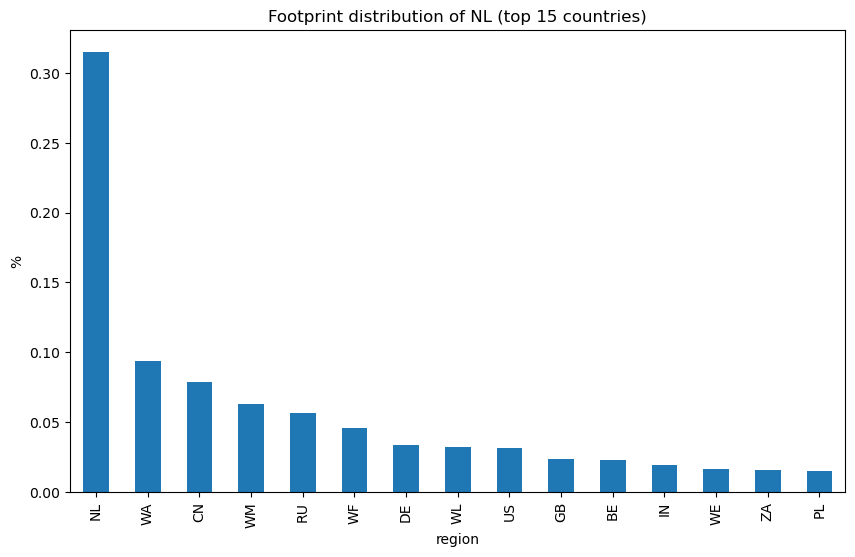

In [15]:
# Plot results in percentage
# ! normalized we only include CBA emissions (and not F_y)
e_cba_gwp100_1country = F_gwp100_agg_1country - F_y_gwp100

(F_gwp100_agg_per_region_1country[:n]/e_cba_gwp100_1country).plot(
    figsize = (10,6),
    kind = 'bar',
    ylabel = "%",
    # ylabel = F_unit.loc[GWP100].values, #
    title = f"Footprint distribution of {country} (top {n} countries)",
)

## Going further
### Imported and Exported pressures

In [16]:
# Calculate fLY for all countries x sector
f_gwp100 = f.loc[GWP100]
F_y_gwp100 = F_y.loc[GWP100].groupby('region').sum()
F_gwp100 = f_gwp100 * (L @ Y).T  # ! right side of * needs to be transposed if it contains multiple columns
F_gwp100 = F_gwp100.T 

# Aggreggate regions accross both columns and index
F_gwp100_agg_region = F_gwp100.groupby('region', axis=1).sum()
F_gwp100_agg_region_per_region = F_gwp100_agg_region.groupby('region', axis=0).sum()
F_gwp100_agg_region_per_region

# Calculate exports and imports
exports = F_gwp100_agg_region_per_region.sum(axis=1)
imports = F_gwp100_agg_region_per_region.sum(axis=0)

In [17]:
# Check net import of a country
country = 'NL'
(imports- exports)[country]

35733120563.552734

#### Share of import in Footprint

In [18]:
# Share of import origin (Select by COLUMNS)
share_import_in_footprint = F_gwp100_agg_region_per_region.divide(imports, axis=1)

if not np.allclose(share_import_in_footprint.sum(axis=0), 1):
    raise ValueError("Total origin != 100% for some regions")

# Display top n-th results
share_import_in_footprint.loc[:, country].sort_values(ascending=False)[:n].round(3)

region
NL    0.315
WA    0.094
CN    0.079
WM    0.063
RU    0.057
WF    0.045
DE    0.034
WL    0.032
US    0.032
GB    0.023
BE    0.023
IN    0.019
WE    0.016
ZA    0.016
PL    0.015
Name: NL, dtype: float64

#### Share of Export in territorial EP

In [19]:
# Share of export destination (Select by INDEX)
share_export_in_territorial = F_gwp100_agg_region_per_region.divide(exports, axis=0)

if not np.allclose(share_export_in_territorial.sum(axis=1), 1):
    raise ValueError("Total destination != 100% for some regions")

# Display top n-th results
share_export_in_territorial.loc[country].sort_values(ascending=False)[:n].round(3)

region
NL    0.380
DE    0.080
GB    0.059
US    0.050
CN    0.047
FR    0.041
BE    0.035
WA    0.035
WM    0.035
WF    0.024
IT    0.017
IE    0.016
WL    0.013
ES    0.013
JP    0.012
Name: NL, dtype: float64

### Calculations accross several indicators and/or regions
#### Breakdown of several indicators for a single region

In [20]:
GHG = [
    'Carbon dioxide (CO2) IPCC categories 1 to 4 and 6 to 7 (excl land use, land use change and forestry)',
    'Methane (CH4) CO2EQ IPCC categories 1 to 4 and 6 to 7 (excl land use, land use change and forestry)',
    'Nitrous Oxide (N2O) CO2EQ IPCC categories 1 to 4 and 6 to 7 (excl land use, land use change and forestry)',
]

country = 'NL'

# display inbetween steps for more readability
f_ghg = f.loc[GHG]
Y_agg_1country = Y.loc[:, country].sum(axis=1)  # Only select the country we want
# F_y_ghg = 0   # ! do not account for final demand

# result
F_ghg_agg_1country = f_ghg * (L @ Y_agg_1country)   # = np.diag(f_) @ L @ Y_  (see Practical 4)
F_ghg_agg_1country.T  # transpose to have the same layout as usual

impact                                                    Carbon dioxide (CO2) IPCC categories 1 to 4 and 6 to 7 (excl land use, land use change and forestry)  \
region sector                                                                                                                                                    
AT     Paddy rice                                                                                  0.000000                                                      
       Wheat                                                                                       1.773990                                                      
       Cereal grains nec                                                                           1.653708                                                      
       Vegetables, fruit, nuts                                                                     0.445990                                                      
       Oil seeds                                                                                   0.477988                                                      
...                                                                                                     ...                                                      
WM     Membership organisation services n.e.c. (91)                                                0.081351                                                      
       Recreational, cultural and sporting services (92)                                           0.474227                                                      
       Other services (93)                                                                         1.573782                                                      
       Private households with employed persons (95)                                               0.159828                                                      
       Extra-territorial organizations and bodies                                                  0.000000                                                      

impact                                                    Methane (CH4) CO2EQ IPCC categories 1 to 4 and 6 to 7 (excl land use, land use change and forestry)  \
region sector                                                                                                                                                   
AT     Paddy rice                                                                                  0.000000                                                     
       Wheat                                                                                       0.001560                                                     
       Cereal grains nec                                                                           0.002078                                                     
       Vegetables, fruit, nuts                                                                     0.001039                                                     
       Oil seeds                                                                                   0.001044                                                     
...                                                                                                     ...                                                     
WM     Membership organisation services n.e.c. (91)                                                0.026906                                                     
       Recreational, cultural and sporting services (92)                                           0.409148                                                     
       Other services (93)                                                                         0.279502                                                     
       Private households with employed persons (95)                                               0.007107               

#### Breakdown of a single indicator for multiple regions

In [21]:
GWP100 = "GHG emissions (GWP100) | Problem oriented approach: baseline (CML, 2001) | GWP100 (IPCC, 2007)"

f_gwp100 = f.loc[GWP100]
# Y = Y  # we consider all countries
# F_y_ghg = 0   # ! do not account for final demand

# Compute all countries at once
F_gwp100 = f_gwp100 * (L @ Y).T  # ! right side of * needs to be transposed if it contains multiple columns
F_gwp100 = F_gwp100.T  # transpose to have the same layout as usual
F_gwp100_agg_region = F_gwp100.groupby(["region"], axis=1).sum()
F_gwp100_agg_region = F_gwp100_agg_region.reindex(index=region_and_sector_labels)
F_gwp100_agg_region

region                                                              AT  \
region sector                                                            
AT     Paddy rice                                         0.000000e+00   
       Wheat                                              2.052558e+08   
       Cereal grains nec                                  3.936384e+08   
       Vegetables, fruit, nuts                            2.060716e+08   
       Oil seeds                                          7.797142e+06   
...                                                                ...   
WM     Membership organisation services n.e.c. (91)       1.481880e+05   
       Recreational, cultural and sporting services (92)  1.045766e+06   
       Other services (93)                                1.263551e+06   
       Private households with employed persons (95)      1.168289e+06   
       Extra-territorial organizations and bodies         0.000000e+00   

region                                                              AU  \
region sector                                                            
AT     Paddy rice                                         0.000000e+00   
       Wheat                                              1.348572e+06   
       Cereal grains nec                                  2.291391e+06   
       Vegetables, fruit, nuts                            2.065618e+05   
       Oil seeds                                          4.086488e+05   
...                                                                ...   
WM     Membership organisation services n.e.c. (91)       5.316586e+04   
       Recreational, cultural and sporting services (92)  5.792159e+05   
       Other services (93)                                9.201730e+05   
       Private households with employed persons (95)      1.969577e+05   
       Extra-territorial organizations and bodies         0.000000e+00   

region                                                              BE  \
region sector                                                            
AT     Paddy rice                                         0.000000e+00   
       Wheat                                              3.374543e+06   
       Cereal grains nec                                  4.101785e+06   
       Vegetables, fruit, nuts                            4.883648e+05   
       Oil seeds                                          1.801371e+06   
...                                                                ...   
WM     Membership organisation services n.e.c. (91)       3.596312e+05   
       Recreational, cultural and sporting services (92)  2.468568e+06   
       Other services (93)                                2.660065e+06   
       Private households with employed persons (95)      2.623980e+06   
       Extra-territorial organizations and bodies         0.000000e+00   

region                                                              BG  \
region sector                                                            
AT     Paddy rice                                         0.000000e+00   
       Wheat                                              7.882612e+06   
       Cereal grains nec                                  1.740162e+06   
       Vegetables, fruit, nuts                            3.367551e+05   
       Oil seeds                                          6.813378e+06   
...                                                                ...   
WM     Membership organisation services n.e.c. (91)       2.762922e+04   
       Recreational, cultural and sporting services (92)  7.120473e+04   
       Other services (93)                                1.034590e+05   
       Private households with employed persons (95)      1.581109e+05   
       Extra-territorial organizations and bodies         0.000000e+00   

region                                                              BR  \
region sector                                                            


In [22]:
# compare the result with the previous method

country = 'NL'

# Original method
Y_agg_1country = Y.loc[:, country].sum(axis=1)  # Only select the country we want
F_gwp100_agg_1country = f_gwp100 * (L @ Y_agg_1country)

# Raise an error if the results are different
if not np.allclose(F_gwp100_agg_1country, F_gwp100_agg_region.loc[:, country]):
    raise ValueError('Discrepancy between the 2 methods')

#### Breakdown of a several indicators for multiple regions

- we can no longer use the tricks above to vectorize (~parallelize) calculations
- we have to use a `for` loop (ideally, accross the smallest sequence between indicators and regions) 

In [23]:
countries = ['US', 'CN']

# Create empty DataFrame
columns = pd.MultiIndex.from_product([countries, GHG], names=['region', 'stressor'])
F_ghg_total_per_import = pd.DataFrame(np.nan, index=region_and_sector_labels, columns=columns)

f_ghg = f.loc[GHG]  # multiple indicators

for country in countries:
    Y_total_1country = Y.loc[:, country].sum(axis=1)  # 1 country for multiple indicators
    F_ghg_total_1country = f_ghg * (L @ Y_total_1country)
    F_ghg_total_1country = F_ghg_total_1country.T  # transpose to ensure it will fit with the DataFrame shape
    F_ghg_total_per_import.loc[:, country] = F_ghg_total_1country.values  # only insert (np.array).values (not the whole dataframe) 
    
F_ghg_total_per_import

region                                                                                                                                                     US  \
stressor                                                 Carbon dioxide (CO2) IPCC categories 1 to 4 and 6 to 7 (excl land use, land use change and forestry)   
region sector                                                                                                                                                   
AT     Paddy rice                                                                                  0.000000                                                     
       Wheat                                                                                       7.885393                                                     
       Cereal grains nec                                                                           8.544597                                                     
       Vegetables, fruit, nuts                                                                     1.280121                                                     
       Oil seeds                                                                                   0.985932                                                     
...                                                                                                     ...                                                     
WM     Membership organisation services n.e.c. (91)                                                0.957528                                                     
       Recreational, cultural and sporting services (92)                                          10.897341                                                     
       Other services (93)                                                                        16.838129                                                     
       Private households with employed persons (95)                                               1.253959                                                     
       Extra-territorial organizations and bodies                                                  0.000000                                                     

region                                                                                                                                                        \
stressor                                                 Methane (CH4) CO2EQ IPCC categories 1 to 4 and 6 to 7 (excl land use, land use change and forestry)   
region sector                                                                                                                                                  
AT     Paddy rice                                                                                  0.000000                                                    
       Wheat                                                                                       0.006935                                                    
       Cereal grains nec                                                                           0.010739                                                    
       Vegetables, fruit, nuts                                                                     0.002981                                                    
       Oil seeds                                                                                   0.002153                                                    
...                                                                                                     ...                                                    
WM     Membership organisation services n.e.c. (91)                                                0.316700                                                    
       Recreational, cultural and sporting services (92)                                           9.401869                                      

In [24]:
countries = region_labels

columns = pd.MultiIndex.from_product([GHG, countries], names=['stressor', 'region'])
F_ghg_total_per_import = pd.DataFrame(np.nan, index=region_and_sector_labels, columns=columns)

for indicator in GHG:
    f_indicator = f.loc[indicator]  # 1 indicator
    Y_countries = Y.loc[:, countries]  # multiple countries
    F_indicator_countries = f_indicator * (L @ Y_countries).T  # ! right side of * needs to be transposed if it contains multiple columns
    F_indicator_countries = F_indicator_countries.T  # transpose to ensure it will fit with the DataFrame shape
    F_indicator_countries = F_indicator_countries.groupby(["region"], axis=1).sum()
    F_indicator_countries = F_indicator_countries.reindex(index=region_and_sector_labels)
    F_ghg_total_per_import.loc[:, indicator] = F_indicator_countries.values  # transpose to have the same layout as usual

F_ghg_total_per_import

stressor                                                 Carbon dioxide (CO2) IPCC categories 1 to 4 and 6 to 7 (excl land use, land use change and forestry)  \
region                                                                                                                                                     AT   
region sector                                                                                                                                                   
AT     Paddy rice                                                                                  0.000000                                                     
       Wheat                                                                                      84.826886                                                     
       Cereal grains nec                                                                         127.906729                                                     
       Vegetables, fruit, nuts                                                                    78.834963                                                     
       Oil seeds                                                                                   2.057727                                                     
...                                                                                                     ...                                                     
WM     Membership organisation services n.e.c. (91)                                                0.105176                                                     
       Recreational, cultural and sporting services (92)                                           0.453157                                                     
       Other services (93)                                                                         1.055519                                                     
       Private households with employed persons (95)                                               1.098695                                                     
       Extra-territorial organizations and bodies                                                  0.000000                                                     

stressor                                                                      \
region                                                          BE        BG   
region sector                                                                  
AT     Paddy rice                                         0.000000  0.000000   
       Wheat                                              0.557330  1.394611   
       Cereal grains nec                                  0.744552  1.332812   
       Vegetables, fruit, nuts                            0.079023  0.186829   
       Oil seeds                                          0.107846  0.475396   
...                                                            ...       ...   
WM     Membership organisation services n.e.c. (91)       0.037734  0.255248   
       Recreational, cultural and sporting services (92)  0.250989  1.069694   
       Other services (93)                                0.768675  2.222110   
       Private households with employed persons (95)      0.185225  2.467673   
       Extra-territorial organizations and bodies         0.000000  0.000000   

stressor                                                                      \
region                                                          CY        CZ   
region sector                                                                  
AT     Paddy rice                                         0.000000  0.000000   
       Wheat                                              3.257679  0.669329   
       Cereal grains nec                                  0.565439  0.670657   
       Vegetables, fruit, nuts                            0.128829  0.103849   
       Oil seeds                                          1.7981